In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [395]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [396]:
df = df.drop(columns=["Poster_Link", "Overview","Certificate"], errors="ignore")

In [397]:
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce").astype("Int64")
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce").astype("Int64")

In [398]:
df.dtypes

Series_Title      object
Released_Year      Int64
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score         Int64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [399]:
df["Released_Year"].unique()

<IntegerArray>
[1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966, 2002, 1990,
 1980, 1975, 2020, 2019, 2014, 1998, 1997, 1995, 1991, 1977, 1962, 1954, 1946,
 2011, 2006, 2000, 1988, 1985, 1968, 1960, 1942, 1936, 1931, 2018, 2017, 2016,
 2012, 2009, 2007, 1984, 1981, 1979, 1971, 1963, 1964, 1950, 1940, 2013, 2005,
 2004, 1992, 1987, 1986, 1983, 1976, 1973, 1965, 1959, 1958, 1952, 1948, 1944,
 1941, 1927, 1921, 2015, 1996, 1989, 1978, 1961, 1955, 1953, 1925, 1924, 1982,
 1967, 1951, 1949, 1939, 1937, 1934, 1928, 1926, 1920, 1970, 1969, 1956, 1947,
 1945, 1930, 1938, 1935, 1933, 1932, 1922, 1943, <NA>]
Length: 100, dtype: Int64

In [400]:
df["Runtime"] = df["Runtime"].str.replace(" min","")
df["Runtime"] = df["Runtime"].astype(int)

In [401]:
df = df.rename(columns = {
    "Series_Title" : "title",
    "Released_Year" : "release_year",
    "Runtime" : "runtime",
    "Genre" : "genre", 
    "IMDB_Rating" : "imdb_rating",
    "Meta_score" : "metascore",
    "Director" : "director",
    "No_of_Votes" : "vote_number",
    "Gross" : "gross",
    "Star1" : "star1",
    "Star2" : "star2",
    "Star3" : "star3",
    "Star4" : "star4"
})

In [402]:
df["gross"] = df["gross"].str.replace(",","")
df["gross"] = pd.to_numeric(df["gross"], errors="coerce").astype("Int64")

In [403]:
df.head()

,title,release_year,runtime,genre,imdb_rating,metascore,director,star1,star2,star3,star4,vote_number,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,"Crime, Drama",9.0,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [404]:
df.isnull().sum()

title             0
release_year      1
runtime           0
genre             0
imdb_rating       0
metascore       157
director          0
star1             0
star2             0
star3             0
star4             0
vote_number       0
gross           169
dtype: int64

In [405]:

plt.rcParams.update({
    "figure.facecolor": "#0C0C0C",
    "axes.facecolor": "#0C0C0C",
    "axes.edgecolor": "#BFBFBF",
    "axes.labelcolor": "#E6E6E6",
    "xtick.color": "#E6E6E6",
    "ytick.color": "#E6E6E6",
    "grid.color": "#707070",
    "grid.alpha": 0.25,
    "text.color": "#E6E6E6",
    "axes.titleweight": "bold",
    "axes.titlepad": 12,
    "axes.titlesize": 14,
    "font.family": "DejaVu Sans Mono",  # sinematik minimal font
    "lines.linewidth": 2,
    "patch.edgecolor": "#BFBFBF",
    "patch.force_edgecolor": True,
    "legend.facecolor": "#0C0C0C",
    "legend.edgecolor": "#707070",
    "legend.labelcolor": "#E6E6E6",
    "axes.grid": True
})

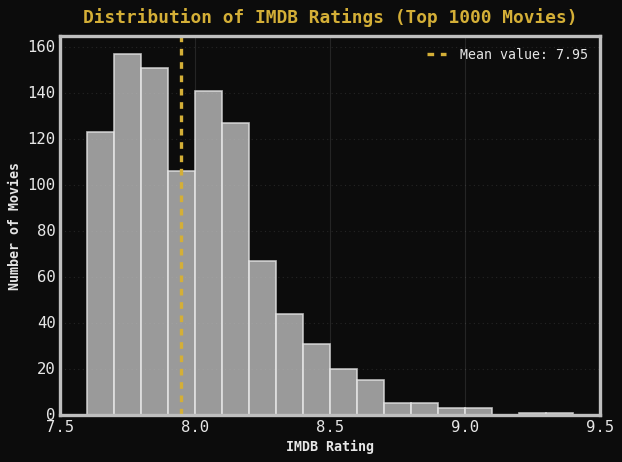

In [406]:
fig, ax = plt.subplots()

mean = df["imdb_rating"].mean()

min_val, max_val = float(df["imdb_rating"].min()), float(df["imdb_rating"].max())
start = np.floor(min_val * 10) / 10
end   = np.ceil(max_val * 10) / 10
bins  = np.arange(start, end + 0.1, 0.1)

ax.hist(
    df["imdb_rating"],
    bins=bins,
    color="#BFBFBF",
    edgecolor="#E6E6E6",
    linewidth=1.5,
    alpha=0.8
)

ax.axvline(
    mean,
    color="#D4AF37",
    linestyle="--",
    linewidth=3,
    label=f"Mean value: {mean:.2f}"
)

ax.set_title(
    "Distribution of IMDB Ratings (Top 1000 Movies)",
    fontsize=16, weight="bold", color="#D4AF37"
)
ax.set_xlabel("IMDB Rating", fontsize=12, weight="bold")
ax.set_ylabel("Number of Movies", fontsize=12, weight="bold")

ax.grid(axis="y", linestyle=":", alpha=0.25)
ax.margins(y=0.05)

ax.legend(frameon=False, fontsize=12, loc="upper right", labelcolor="#E6E6E6")

plt.tight_layout()

plt.savefig("imdb_distribution.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()


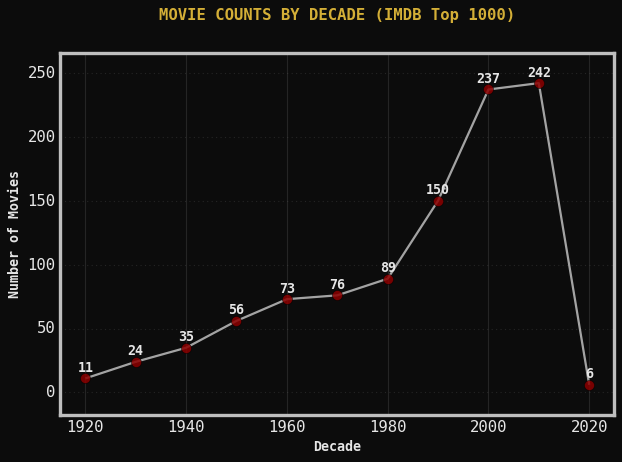

In [407]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots()

df["decade"] = (df["release_year"] // 10) * 10
decade_counts = df.groupby("decade")["title"].count()
ax.set_xticks(decade_counts.index[::2])

ax.plot(
    decade_counts.index,
    decade_counts.values,
    marker="o",
    ms=9,
    markerfacecolor="#8B0000",
    color="#BFBFBF",
    linewidth=2,
    alpha=0.85
)

for x, y in zip(decade_counts.index, decade_counts.values):
    ax.text(
        x,
        y + 3,
        str(y),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="#E6E6E6"
    )

ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style="plain", axis="x")
ax.margins(x=0.05)
ax.set_title("MOVIE COUNTS BY DECADE (IMDB Top 1000)", weight="bold", pad=30, color="#D4AF37")
ax.set_xlabel("Decade", fontsize=12, weight="bold")
ax.set_ylabel("Number of Movies", fontsize=12, weight="bold")
ax.margins(y=0.1)
ax.grid(axis="y", linestyle=":", alpha=0.25)
plt.tight_layout()

plt.savefig("counts_by_decade.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

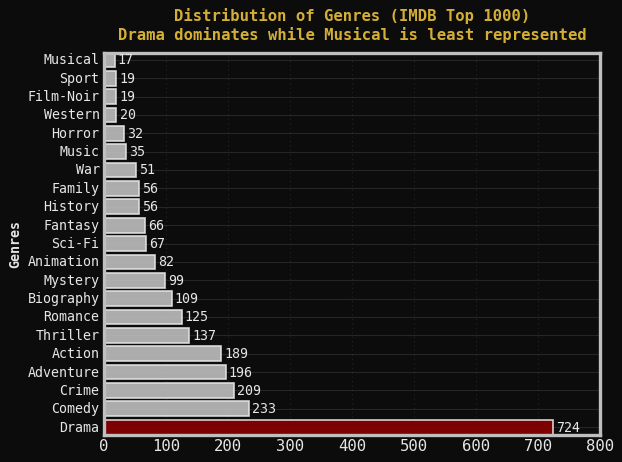

In [408]:
fig, ax = plt.subplots()

genre_counts = df["genre"].str.split(", ").explode().value_counts()
colors = ["#BFBFBF" if g != "Drama" else "#8B0000" for g in genre_counts.index]

ax.barh(
    genre_counts.index.astype(str),
    genre_counts.values,
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.5
)

ax.tick_params(axis="y", labelsize=12)

for i, v in enumerate(genre_counts.values):
    ax.text(
        v + 5,
        i,
        str(v),
        va="center",
        fontsize=12,
        color="#E6E6E6"
    )

ax.grid(axis="x", linestyle=":", alpha=0.25)

ax.set_title(
    "Distribution of Genres (IMDB Top 1000)\nDrama dominates while Musical is least represented",
    fontsize=14,
    weight="bold",
    color="#D4AF37"
)
ax.set_ylabel("Genres", fontsize=12, weight="bold")
plt.tight_layout()

plt.savefig("genre_distribution.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()


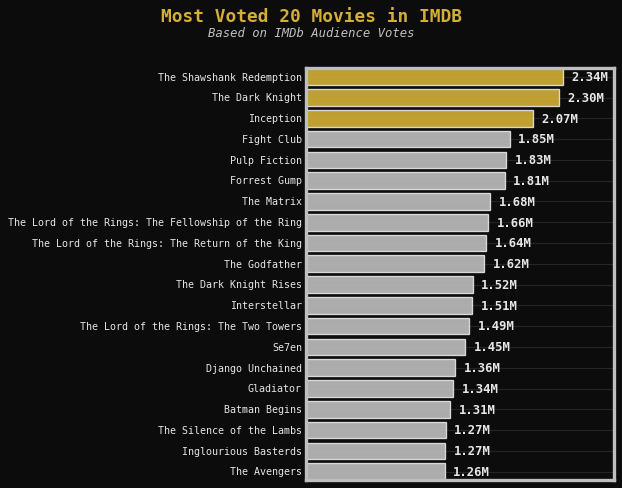

In [409]:
top20_votes = df.nlargest(20, "vote_number")[["title", "vote_number"]].sort_values(
    by="vote_number", ascending=False
)

fig, ax = plt.subplots()

colors = ["#D4AF37" if i < 3 else "#BFBFBF" for i in range(len(top20_votes))]

ax.barh(
    top20_votes["title"],
    top20_votes["vote_number"],
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.2
)

plt.suptitle(
    "Most Voted 20 Movies in IMDB",
    fontsize=16,
    weight="bold",
    ha="center",
    color="#D4AF37",
    y=1.02
)
plt.figtext(
    0.5,
    0.96,
    "Based on IMDb Audience Votes",
    ha="center",
    fontsize=11,
    style="italic",
    color="#BFBFBF"
)

ax.set_xlim(0, top20_votes["vote_number"].max() * 1.2)

for i, v in enumerate(top20_votes["vote_number"]):
    ax.text(
        v + 80000,
        i,
        f"{v/1_000_000:.2f}M",
        va="center",
        ha="left",
        fontsize=11,
        weight="bold",
        color="#E6E6E6"
    )

ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.tick_params(axis="y", labelsize=9, colors="#E6E6E6")

plt.tight_layout()

plt.savefig("most_voted_20.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

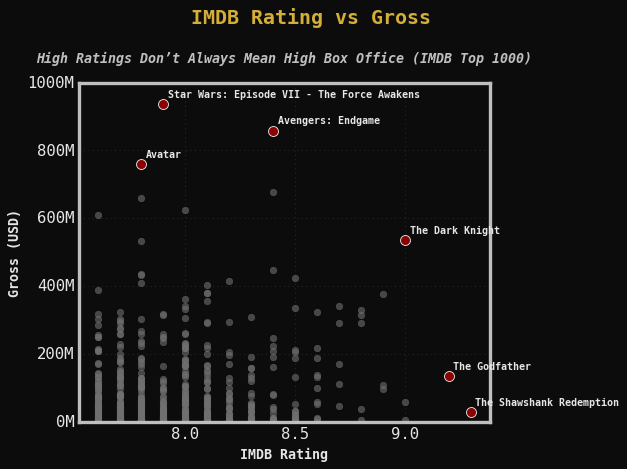

In [410]:
import matplotlib.ticker as mticker

df_scatter = df.dropna(subset=["gross", "imdb_rating"])

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    df_scatter["imdb_rating"],
    df_scatter["gross"],
    alpha=0.6,
    color="#707070",
    s=35
)

fig.suptitle("IMDB Rating vs Gross", fontsize=18, weight="bold", color="#D4AF37")
ax.set_title(
    "High Ratings Don’t Always Mean High Box Office (IMDB Top 1000)",
    fontsize=12,
    style="italic",
    pad=18,
    color="#BFBFBF"
)

ax.set_xlabel("IMDB Rating", fontsize=12, weight="bold")
ax.set_ylabel("Gross (USD)", fontsize=12, weight="bold")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x/1e6)}M"))
ax.set_ylim(0)

outliers = df.loc[[59, 477, 0, 1, 2, 623]]
ax.scatter(
    outliers["imdb_rating"],
    outliers["gross"],
    color="#8B0000",
    s=80,
    edgecolor="#E6E6E6",
    linewidth=0.8,
    label="Top Outliers"
)

for i, row in outliers.iterrows():
    ax.text(
        row["imdb_rating"] + 0.02,
        row["gross"] + 20_000_000,
        row["title"],
        fontsize=9,
        weight="bold",
        color="#E6E6E6"
    )

ax.margins(y=0.01)
ax.grid(True, linestyle=":", alpha=0.25)

plt.tight_layout()

plt.savefig("rating_vs_gross.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()


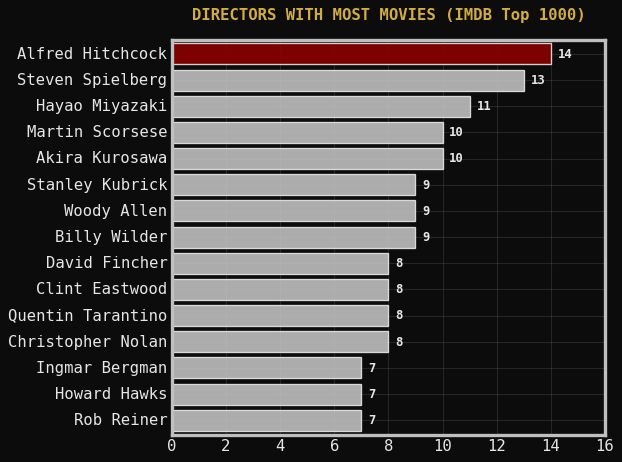

In [411]:
most_movies = (
    df.groupby("director")["title"]
      .count()
      .sort_values(ascending=False)
      .head(15)
      .reset_index()
      .rename(columns={"title": "movie_number"})
      .iloc[::-1]
)

fig, ax = plt.subplots()

colors = ["#8B0000" if d == "Alfred Hitchcock" else "#BFBFBF" for d in most_movies["director"]]

ax.barh(
    most_movies["director"],
    most_movies["movie_number"],
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.2
)

for i, v in enumerate(most_movies["movie_number"]):
    ax.text(
        v + 0.25,
        i,
        str(v),
        va="center",
        fontsize=11,
        fontweight="bold",
        color="#E6E6E6"
    )

ax.set_title(
    "DIRECTORS WITH MOST MOVIES (IMDB Top 1000)",
    weight="bold",
    fontsize=14,
    pad=18,
    color="#D4AF37"
)

ax.set_xlim(0, most_movies["movie_number"].max() + 2)
ax.margins(y=0.01)

plt.tight_layout()
plt.savefig("directors_most_movies.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()


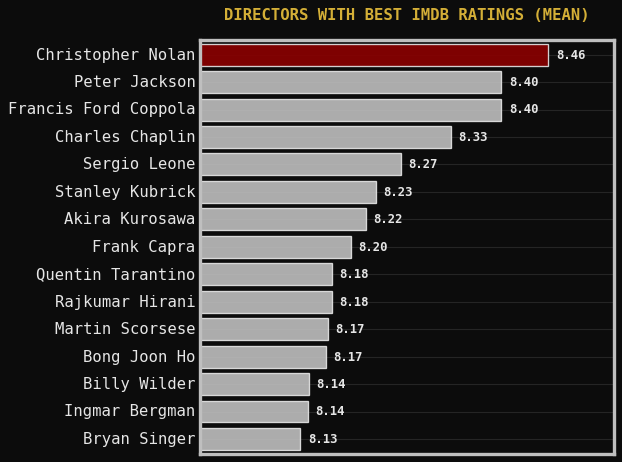

In [412]:
director_stats = (
    df.groupby("director")
      .agg(avg_rating=("imdb_rating", "mean"), movie_count=("title", "count"))
      .reset_index()
)

director_stats = director_stats[director_stats["movie_count"] >= 3]

top_directors = director_stats.sort_values("avg_rating", ascending=False).head(15).iloc[::-1]

fig, ax = plt.subplots()

colors = ["#8B0000" if d == "Christopher Nolan" else "#BFBFBF" for d in top_directors["director"]]

ax.barh(
    top_directors["director"],
    top_directors["avg_rating"],
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.2
)

for i, v in enumerate(top_directors["avg_rating"]):
    ax.text(
        v + 0.01,
        i,
        f"{v:.2f}",
        va="center",
        fontsize=11,
        fontweight="bold",
        color="#E6E6E6"
    )

ax.set_title(
    "DIRECTORS WITH BEST IMDB RATINGS (MEAN)",
    weight="bold",
    fontsize=14,
    pad=18,
    color="#D4AF37"
)

ax.set_xlim(8, 8.55)
plt.xticks([])

ax.margins(y=0.01)
plt.tight_layout()
plt.savefig("directors_with_best_imdb.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()


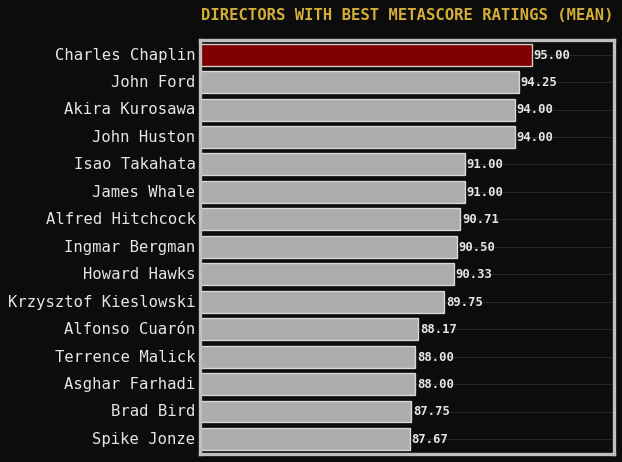

In [413]:
df_meta = df.dropna(subset=["metascore"])

director_meta = (
    df_meta.groupby("director")
           .agg(avg_metascore=("metascore", "mean"), movie_count=("title", "count"))
           .reset_index()
)

director_meta = director_meta[director_meta["movie_count"] >= 3]

top_directors_meta = director_meta.sort_values("avg_metascore", ascending=False).head(15).iloc[::-1]

fig, ax = plt.subplots()

max_director = top_directors_meta.loc[top_directors_meta["avg_metascore"].idxmax(), "director"]
colors = ["#8B0000" if d == max_director else "#BFBFBF" for d in top_directors_meta["director"]]

ax.barh(
    top_directors_meta["director"],
    top_directors_meta["avg_metascore"],
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.2
)

for i, v in enumerate(top_directors_meta["avg_metascore"]):
    ax.text(
        v + 0.1,
        i,
        f"{v:.2f}",
        va="center",
        fontsize=11,
        fontweight="bold",
        color="#E6E6E6"
    )

ax.set_title(
    "DIRECTORS WITH BEST METASCORE RATINGS (MEAN)",
    weight="bold",
    fontsize=14,
    pad=18,
    color="#D4AF37"
)

ax.set_xlim(75, 100)
plt.xticks([])
ax.margins(y=0.01)

plt.tight_layout()
plt.savefig("directors_with_best_metascore.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

In [414]:
all_stars = pd.concat([df["star1"], df["star2"], df["star3"], df["star4"]])

In [415]:
star_counts = all_stars.value_counts().head(15).sort_values()

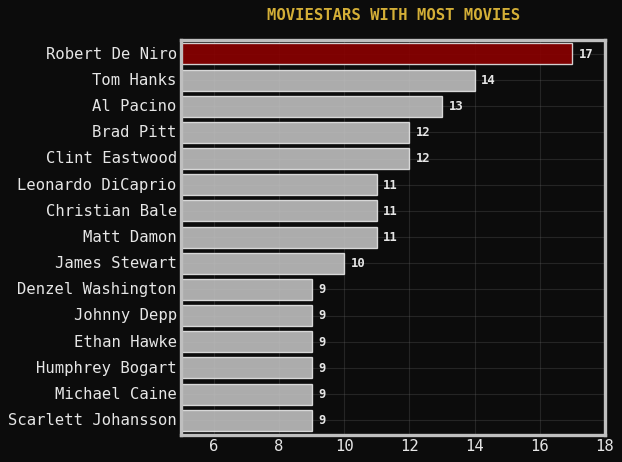

In [416]:
fig, ax = plt.subplots()

max_star = star_counts.idxmax()
colors = ["#8B0000" if star == max_star else "#BFBFBF" for star in star_counts.index]

ax.barh(
    star_counts.index,
    star_counts.values,
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.2
)

for i, v in enumerate(star_counts.values):
    ax.text(
        v + 0.2,
        i,
        str(v),
        va="center",
        fontsize=11,
        fontweight="bold",
        color="#E6E6E6"
    )

ax.set_title(
    "MOVIESTARS WITH MOST MOVIES",
    weight="bold",
    fontsize=14,
    pad=18,
    color="#D4AF37"
)

ax.set_xlim(5, 18)
ax.margins(y=0.01)

plt.tight_layout()
plt.savefig("stars_with_most_movies.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

In [417]:
df.head()

,title,release_year,runtime,genre,imdb_rating,metascore,director,star1,star2,star3,star4,vote_number,gross,decade
0,The Shawshank Redemption,1994,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,1990
1,The Godfather,1972,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,1970
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,2000
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,1970
4,12 Angry Men,1957,96,"Crime, Drama",9.0,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,1950


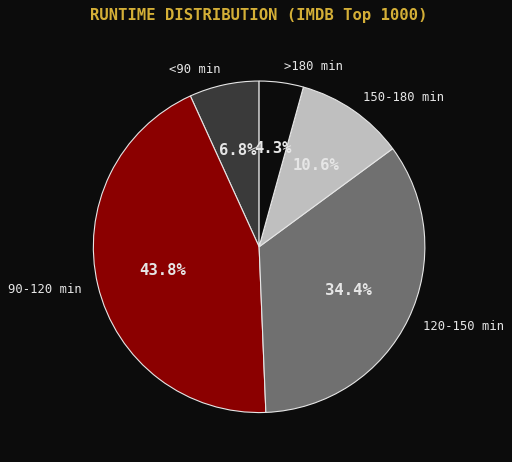

In [418]:
bins = [0, 90, 120, 150, 180, df["runtime"].max()]
labels = ["<90 min", "90-120 min", "120-150 min", "150-180 min", ">180 min"]

df["runtime_category"] = pd.cut(df["runtime"], bins=bins, labels=labels, right=False)
runtime_counts = df["runtime_category"].value_counts().sort_index()

colors = ["#3A3A3A", "#8B0000", "#707070", "#BFBFBF", "#0C0C0C"]

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    runtime_counts,
    labels=runtime_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "#E6E6E6", "linewidth": 1}
)

for t in texts:
    t.set_color("#E6E6E6")
    t.set_fontsize(11)

for a in autotexts:
    a.set_color("#E6E6E6")
    a.set_fontweight("bold")

plt.title("RUNTIME DISTRIBUTION (IMDB Top 1000)", fontsize=14, weight="bold", color="#D4AF37", pad=18)

plt.tight_layout()
plt.savefig("runtime_distribution.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()


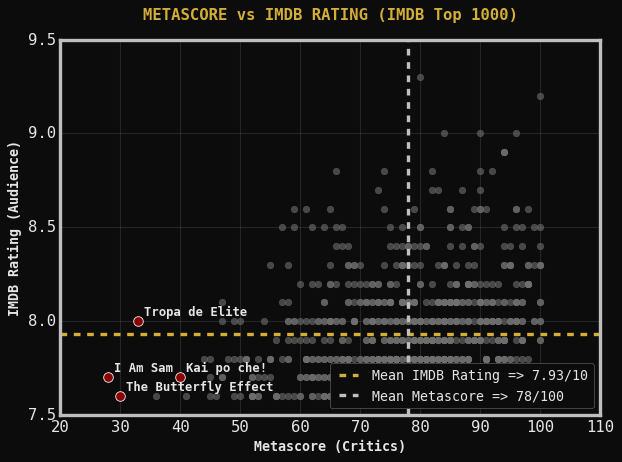

In [419]:
df_meta = df.dropna(subset=["imdb_rating", "metascore"])

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(
    df_meta["metascore"],
    df_meta["imdb_rating"],
    alpha=0.6,
    color="#707070",
    s=35
)

outlier_idx = [356, 735, 788, 942]
outliers = df_meta.loc[outlier_idx]

ax.scatter(
    outliers["metascore"],
    outliers["imdb_rating"],
    color="#8B0000",
    s=75,
    edgecolor="#E6E6E6",
    linewidth=0.8
)

for i, row in outliers.iterrows():
    ax.text(
        row["metascore"] + 1,
        row["imdb_rating"] + 0.03,
        row["title"],
        fontsize=11,
        weight="bold",
        color="#E6E6E6"
    )

ax.set_xlabel("Metascore (Critics)", fontsize=12, weight="bold")
ax.set_ylabel("IMDB Rating (Audience)", fontsize=12, weight="bold")

ax.set_title(
    "METASCORE vs IMDB RATING (IMDB Top 1000)",
    fontsize=14,
    weight="bold",
    color="#D4AF37",
    pad=18
)

ax.axhline(
    df_meta["imdb_rating"].mean(),
    color="#D4AF37",
    linestyle="--",
    linewidth=3,
    label=f"Mean IMDB Rating => {df_meta['imdb_rating'].mean():.2f}/10"
)

ax.axvline(
    df_meta["metascore"].mean(),
    color="#BFBFBF",
    linestyle="--",
    linewidth=3,
    label=f"Mean Metascore => {df_meta['metascore'].mean():.0f}/100"
)

ax.legend(fontsize=12, loc="lower right", labelcolor="#E6E6E6")

plt.tight_layout()
plt.savefig("metascore_vs_imdb.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()



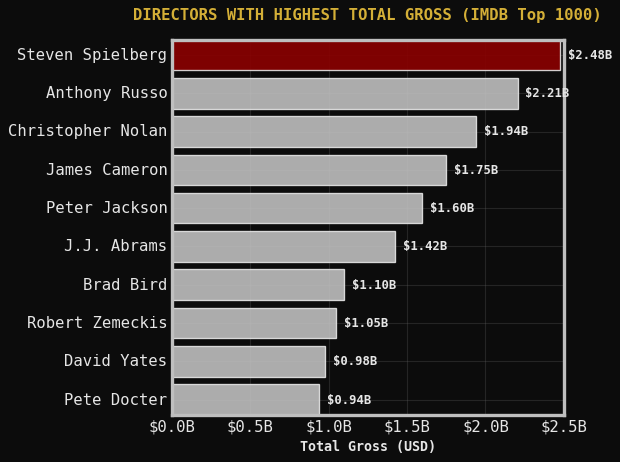

In [420]:
import matplotlib.ticker as mticker

df_gross = df.dropna(subset=["gross"])

director_gross = (
    df_gross.groupby("director")["gross"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .sort_values(ascending=True)
)

fig, ax = plt.subplots()

max_director = director_gross.idxmax()
colors = ["#8B0000" if d == max_director else "#BFBFBF" for d in director_gross.index]

bars = ax.barh(
    director_gross.index,
    director_gross.values,
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.2
)

labels = [f"${val/1e9:.2f}B" for val in director_gross.values]
for bar, label in zip(bars, labels):
    ax.text(
        bar.get_width() + 5e7,
        bar.get_y() + bar.get_height() / 2,
        label,
        va="center",
        fontsize=11,
        fontweight="bold",
        color="#E6E6E6"
    )

ax.set_title(
    "DIRECTORS WITH HIGHEST TOTAL GROSS (IMDB Top 1000)",
    fontsize=14,
    weight="bold",
    color="#D4AF37",
    pad=18
)

ax.set_xlabel("Total Gross (USD)", fontsize=12, weight="bold")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x/1e9:.1f}B"))

plt.tight_layout()
plt.savefig("directors_with_highest_gross.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

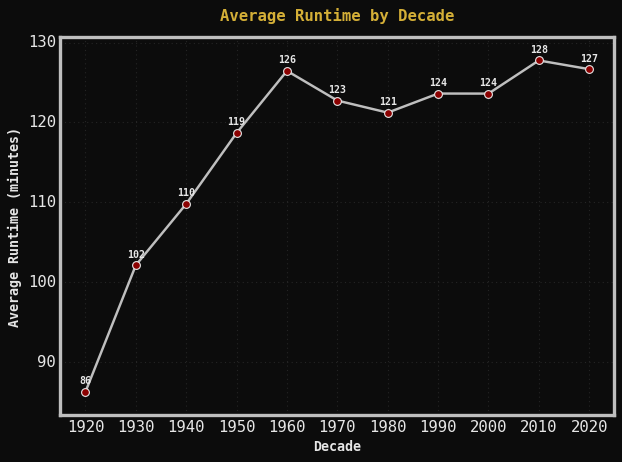

In [421]:
decade_runtime = (
    df.groupby((df["release_year"] // 10) * 10)["runtime"]
    .mean()
    .reset_index()
    .rename(columns={"release_year": "decade"})
)

fig, ax = plt.subplots()

ax.plot(
    decade_runtime["decade"].astype(str),
    decade_runtime["runtime"],
    marker="o",
    markersize=7,
    markerfacecolor="#8B0000",
    markeredgecolor="#E6E6E6",
    markeredgewidth=1,
    color="#BFBFBF",
    linewidth=2.2
)

for x, y in zip(decade_runtime["decade"], decade_runtime["runtime"]):
    ax.text(
        str(x),
        y + 1,
        f"{y:.0f}",
        ha="center",
        fontsize=9,
        weight="bold",
        color="#E6E6E6"
    )

ax.set_title(
    "Average Runtime by Decade",
    fontsize=14,
    weight="bold",
    color="#D4AF37",
    pad=15
)

ax.set_xlabel("Decade", fontsize=12, weight="bold")
ax.set_ylabel("Average Runtime (minutes)", fontsize=12, weight="bold")

ax.grid(alpha=0.25, linestyle=":")
ax.margins(y=0.07)
ax.margins(x=0.05)

plt.tight_layout()
plt.savefig("average_runtime_by_decade.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()

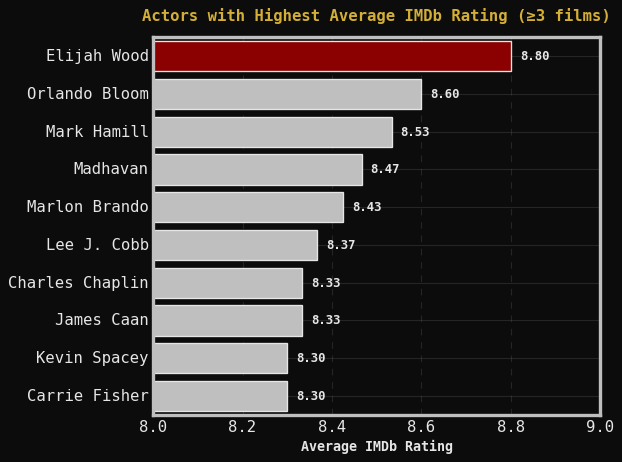

In [422]:
actors = df.melt(
    id_vars=["title", "imdb_rating"],
    value_vars=["star1", "star2", "star3", "star4"],
    var_name="which_star",
    value_name="actor"
)

stats = (
    actors.groupby("actor", as_index=False)
    .agg(count=("title", "count"), avg_rating=("imdb_rating", "mean"))
)

stats = stats[stats["count"] >= 3]

TOP_N = 10
top_actors = (
    stats.sort_values(["avg_rating", "count"], ascending=[False, False])
    .head(TOP_N)
)

fig, ax = plt.subplots()

max_actor = top_actors.iloc[0]["actor"]
colors = ["#8B0000" if a == max_actor else "#BFBFBF" for a in top_actors["actor"]]

bars = ax.barh(
    top_actors["actor"],
    top_actors["avg_rating"],
    color=colors,
    edgecolor="#E6E6E6",
    linewidth=1.2
)

ax.invert_yaxis()

for i, v in enumerate(top_actors["avg_rating"]):
    ax.text(
        v + 0.02,
        i,
        f"{v:.2f}",
        va="center",
        weight="bold",
        fontsize=11,
        color="#E6E6E6"
    )

ax.set_title(
    "Actors with Highest Average IMDb Rating (≥3 films)",
    fontsize=14,
    weight="bold",
    color="#D4AF37",
    pad=15
)

ax.set_xlabel("Average IMDb Rating", fontsize=12, weight="bold")
ax.set_xlim(8, 9)

ax.grid(axis="x", alpha=0.25, linestyle="--")
ax.margins(y=0.01)

plt.tight_layout()
plt.savefig("actors_with_highest_imdb.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()


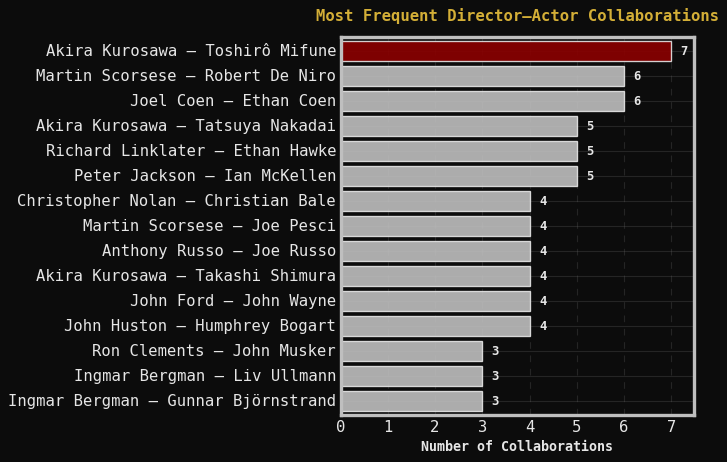

In [423]:
from collections import Counter

pairs = []
for i, row in df.iterrows():
    director = row["director"]
    for star in [row["star1"], row["star2"], row["star3"], row["star4"]]:
        if pd.notna(star) and star != director:
            pairs.append((director, star))

pair_counts = Counter(pairs)
pair_df = pd.DataFrame(pair_counts.items(), columns=["pair", "count"])
pair_df["pair"] = pair_df["pair"].apply(lambda x: f"{x[0]} – {x[1]}")

top_pairs = pair_df.sort_values("count", ascending=False).head(15)

fig, ax = plt.subplots(figsize=(9, 6))

max_pair = top_pairs.iloc[0]["pair"]
colors = ["#8B0000" if p == max_pair else "#BFBFBF" for p in top_pairs["pair"]]

bars = ax.barh(
    top_pairs["pair"],
    top_pairs["count"],
    color=colors,
    edgecolor="#E6E6E6",
    alpha=0.9,
    linewidth=1.2
)

ax.invert_yaxis()

for i, v in enumerate(top_pairs["count"]):
    ax.text(
        v + 0.2,
        i,
        str(v),
        va="center",
        weight="bold",
        fontsize=11,
        color="#E6E6E6"
    )

ax.set_title(
    "Most Frequent Director–Actor Collaborations",
    fontsize=14,
    weight="bold",
    color="#D4AF37",
    pad=15
)

ax.set_xlabel("Number of Collaborations", fontsize=12, weight="bold")
ax.grid(axis="x", alpha=0.25, linestyle="--")
ax.margins(y=0.01)
ax.margins(x=0.07)
plt.tight_layout()
plt.savefig("director-actor.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())
plt.show()